In [24]:
import sys
# sys.path.append("..")

import numpy as np
np.seterr(divide="ignore")
import logging
import pickle
import glob
import pandas as pd
import os
import scipy as sp
import json

# from sklearn.preprocessing import RobustScaler
# from sklearn.utils import check_random_state
# from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from scipy import interp

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)


import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors
from matplotlib.patches import Ellipse

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

rcParams.update({'figure.autolayout': True})
# plt.rc('font', family='serif')

In [25]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
mpl.rc('axes',edgecolor='k')
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'

plt.rcParams['text.usetex'] = False
# plt.rcParams['font.family'] = "serif"
# plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

# Helper functions

### Load all the info (hyperparameteres, auc, fpr, tpr, output prob, etc) for each run in a dictionary

In [26]:
def load_results(hyperparam_dir,show_data=False):  
    results_dictionary = []
#     for folder in os.listdir(hyperparam_dir):
#         print(folder)
    names = hyperparam_dir.split('/')[-1].split("_")
    if show_data:
        print('names=',names)
        
    Name=names[-15]
    lr = names[-13]
    decay = names[-11]
    batch = names[-9]
    epochs = names[-7]
    hidden = names[-5]
    Njets = names[-3]
    Nfeatures = names [-1]
    for subdir in os.listdir(hyperparam_dir):
        if subdir.startswith('run') and ('metrics_test_best.json' in os.listdir(hyperparam_dir+'/'+subdir)):
#             print(subdir)
            with open(hyperparam_dir+'/'+subdir+'/metrics_test_best.json') as f:
                data = json.load(f)
            rocname = [filename for filename in np.sort(os.listdir(hyperparam_dir+'/'+subdir)) if filename.startswith('roc_')][0]
            outprobname =[filename for filename in np.sort(os.listdir(hyperparam_dir+'/'+subdir)) if filename.startswith('yProbTrue_')][0]
            with open(hyperparam_dir+'/'+subdir+'/'+rocname, "rb") as f: roc=list(pickle.load(f))
            with open(hyperparam_dir+'/'+subdir+'/'+outprobname, "rb") as f: yProbTrue=list(pickle.load(f))
    #             print(list(roc))
    #             fpr=[x for (x,y) in roc]
    #             tpr=[y for (x,y) in roc]
    #             print('fpr = ',fpr)
            dictionary = {'name':Name,
                          'runName':subdir,
                          'lr':float(lr),
                          'decay':float(decay),
                          'batch':int(batch),
                          'hidden':int(hidden),
                          'Njets':Njets,
                          'Nfeatures':Nfeatures,
                          'accuracy':data['accuracy'], 
                          'loss':data['loss'],
                          'auc':data['auc'],
                          'roc':np.asarray(roc),
                          'fpr':np.asarray([x for (x,y) in roc]),
                          'tpr':np.asarray([y for (x,y) in roc]),
                          'yProbTrue':np.asarray(yProbTrue)}

            results_dictionary.append(dictionary)
            if show_data:
                 print(dictionary)


    return results_dictionary


In [27]:
results_dic_test= load_results('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_1200000_features_7',show_data=False)
 
print('len(results_dic_test)=',len(results_dic_test))    
# yProbTrue=results_dic_test[0]['yProbTrue']     
yProbTrue= np.asarray([element['yProbTrue'] for element in results_dic_test])

print('shape y_Prob=',np.shape(yProbTrue))

# print('yProbTrue=',yProbTrue[0,300000:300020,1])
for i in range(len(yProbTrue)):
    unique, counts = np.unique(yProbTrue[i,:,1], return_counts=True)
    print('Number of sg and bg jets=',dict(zip(unique, counts)))
    
print('yTrue[0,20:40,1]=',yProbTrue[0,20:40,1])
# print('yProbTrue=',yProbTrue[0][300000:300020])
# print('yProbTrue=',yProbTrue[1][300000:300020])

# yProb=yProbTrue[:,:,0]
# yTrue=yProbTrue[0,:,1]
#     yTrue2=yProbTrue[1,:,1]
#     print('shape y_Prob=',np.shape(yProb))
#     print('shape y_True',np.shape(yTrue))
#     print(yProb[0:3])
#     print('yTrue =',yTrue[0:3])
#     print('yTrue2=',yTrue2[0:20])

len(results_dic_test)= 10
shape y_Prob= (10, 400000, 2)
Number of sg and bg jets= {0.0: 199974, 1.0: 200026}
Number of sg and bg jets= {0.0: 199974, 1.0: 200026}
Number of sg and bg jets= {0.0: 199974, 1.0: 200026}
Number of sg and bg jets= {0.0: 199974, 1.0: 200026}
Number of sg and bg jets= {0.0: 199974, 1.0: 200026}
Number of sg and bg jets= {0.0: 199974, 1.0: 200026}
Number of sg and bg jets= {0.0: 199974, 1.0: 200026}
Number of sg and bg jets= {0.0: 199974, 1.0: 200026}
Number of sg and bg jets= {0.0: 199974, 1.0: 200026}
Number of sg and bg jets= {0.0: 199974, 1.0: 200026}
yTrue[0,20:40,1]= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Get standard deviation and remove outliers

In [73]:
def remove_outliers(rocs, fprs, tprs, yProbTrue, runName, top_ref=False,accuracy=None):
    inv_fprs = []
    base_tpr = np.linspace(0.05, 1, 476)

#     print('fprs=',fprs)
    
    for fpr, tpr in zip(fprs, tprs):
        inv_fpr = interp(base_tpr, tpr, 1. / fpr)
        inv_fprs.append(inv_fpr)

    inv_fprs = np.array(inv_fprs)
    
#     print('inv_fprs=',inv_fprs)
    
    # We get the background rejection at 50% tagging eff for all the runs
    scores = inv_fprs[:, 225]  # 0.05+225*(1-0.05)/476=0.5. So we get the point at 0.5 tagging efficiency
    
#     print('scores=',scores)

    
    entries=[]
    for index,entry in enumerate(scores):
        if not np.isnan(entry): 
            entries.append(index)
#         else:
#             print('index=',index)

    scores=scores[entries]
#     print('scores=',scores)
        
#     print('inv_fprs=',inv_fprs)
    
    p25 = np.percentile(scores, 1 / 6. * 100.)
    p75 = np.percentile(scores, 5 / 6. * 100)
    
#     print('p25=',p25)
#     print('p75=', p75)
    
    
    
    # Get mean and std at 50% tagging eff
    robust_mean = np.mean([scores[i] for i in range(len(scores)) if p25 <= scores[i] <= p75])
    robust_std = np.std([scores[i] for i in range(len(scores)) if p25 <= scores[i] <= p75])
    
    #Keep the runs  whose bg rejection at 50% tag eff, fall within 3 std of the mean
    scores = inv_fprs[:, 225]  # 0.05+225*(1-0.05)/476=0.5. So we get the point at 0.5 tagging efficiency
    indices = [i for i in range(len(scores)) if robust_mean - 3*robust_std <= scores[i] <= robust_mean + 3*robust_std]
#     indices = [i for i in range(len(scores)) if robust_mean - 5*robust_std <= scores[i] <= robust_mean + 5*robust_std]
#     indices = [i for i in range(len(scores))]
    
#     print('indices=', indices)
    
    new_auc, new_fpr, new_tpr , new_yProbTrue, new_runName, new_accuracy= [], [], [],[],[],[] 
    
    # Remove outliers or get 1st 9 runs if top_ref==True (for the top tag reference dataset)
    if top_ref:
            if len(rocs)>=9:
                new_auc=rocs[0:9]
                new_fpr=fprs[0:9]
                new_tpr=tprs[0:9]
                new_yProbTrue=yProbTrue[0:9]
                new_runName=runName[0:9]
                new_accuracy=accuracy[0:9]
            else:
                new_auc=rocs
                new_fpr=fprs
                new_tpr=tprs
                new_yProbTrue=yProbTrue
                new_runName=runName
                new_accuracy=accuracy
                
#     if top_ref:
#             new_auc=rocs[0:7]
#             new_fpr=fprs[0:7]
#             new_tpr=tprs[0:7]
#             new_yProbTrue=yProbTrue[0:7]
#             new_runName=runName[0:7]
#             new_accuracy=accuracy[0:7]           
           
    else: #remove outliers
        for i in indices:
            new_auc.append(rocs[i])
            new_fpr.append(fprs[i])
            new_tpr.append(tprs[i])
            new_yProbTrue.append(yProbTrue[i])
            new_runName.append(runName[i])
            new_accuracy.append(accuracy[i])
    
#     print('len(new_auc)=',len(new_auc))
    return new_auc, new_fpr, new_tpr, np.asarray(new_yProbTrue), new_runName, new_accuracy

In [29]:
def report_score(mean_auc, std_auc, mean_inv_fpr, std_inv_fpr, label, accuracy=None,  latex=False, input_name="particles", short=False):       
#     inv_fprs = []
#     base_tpr = np.linspace(0.05, 1, 476)
    
#     for fpr, tpr in zip(fprs, tprs):
#         inv_fpr = interp(base_tpr, tpr, 1. / fpr)
#         inv_fprs.append(inv_fpr)
        
#     inv_fprs = np.array(inv_fprs)
#     mean_inv_fprs = inv_fprs.mean(axis=0)
    
    if not latex:
        print("%32s\tROC AUC=%.4f+-%.2f\t1/FPR@TPR=0.5=%.2f+-%.2f" %  (label, mean_auc, std_auc, mean_inv_fpr, std_inv_fpr))
#                                                                        np.mean(rocs), 
#                                                                        np.std(rocs),
#                                                                        np.mean(inv_fprs[:, 225]),
#                                                                        np.std(inv_fprs[:, 225])))
    else:
        if not short:
            print("%10s \t& %30s \t& acc: %.4f    \t& auc: %.4f $\pm$ %.4f \t& R:%.1f $\pm$ %.1f \\\\" % 
                  (input_name,label, accuracy, mean_auc, std_auc, mean_inv_fpr, std_inv_fpr))
#                    np.mean(rocs), 
#                    np.std(rocs),
#                    np.mean(inv_fprs[:, 225]),
#                    np.std(inv_fprs[:, 225])))
        else:
            print("%30s \t& %.4f $\pm$ %.4f \t& %.1f $\pm$ %.1f \\\\" % 
                  (label,mean_auc, std_auc, mean_inv_fpr, std_inv_fpr))
#                    np.mean(rocs), 
#                    np.std(rocs),
#                    np.mean(inv_fprs[:, 225]),
#                    np.std(inv_fprs[:, 225])))

In [30]:
# Call at the end to show the plot
def plot_show(filename=None,totjets=None,title=None):
    plt.tight_layout()
    plt.title(title+' - '+totjets+'k total training jets')
    plt.xlabel("Signal efficiency", fontsize=15)
    plt.ylabel("1 / Background efficiency", fontsize=15)
    plt.xlim([-0.01, 1.02])
    plt.ylim(1, 200000)
#     plt.xlim([0.2, 0.4])
#     plt.ylim(700, 2000)
    plt.yscale("log")
    plt.legend(loc="best")
    plt.grid(which='both',axis='both',linestyle='--')
#     plt.figure(figsize=(100,100))
    
#     if filename:
#         plt.savefig(filename)
    
    plt.show()

### Get mean and median ROC curves 

In [31]:
def mean_median_roc(yProbTrue,mean=False,median=False):
#     print('yProbTrue=',yProbTrue[0])
    yProb=yProbTrue[:,:,0]
    yTrue=yProbTrue[0,:,1]
#     yTrue2=yProbTrue[1,:,1]
#     print('shape y_Prob=',np.shape(yProb))
#     print('shape y_True',np.shape(yTrue))
#     print(yProb[0:3])
#     print('yTrue =',yTrue[0:3])
#     print('yTrue2=',yTrue2[0:20])
    
    if mean:
        yProb=np.mean(yProb,axis=0)
        auc=roc_auc_score(yTrue, yProb)
        
        acc= get_accuracy(yProb,yTrue)
        
    elif median:
#         print('yProb[:,100]=',np.sort(yProb[:,1000]))
        yProb=np.median(yProb,axis=0)
        auc=roc_auc_score(yTrue, yProb) 
#         print('yProb shape=',np.shape(yProb))
#         print('median yProb[100]=',yProb[1000])
#         print('yTrue=',yTrue[1000])
        acc= get_accuracy(yProb,yTrue)

    if mean!=median: #Only one of them should be true 
#         print(np.shape(yProb))
        fpr, tpr, thresholds = roc_curve(yTrue, yProb,pos_label=1, drop_intermediate=False)
        return fpr, tpr, auc, acc

In [32]:
# compute the accuracy    
def get_accuracy(outputs, labels):
    """
    Compute the accuracy, given the outputs and labels for all tokens. 
    Args:
        outputs: (np.ndarray) dimension batch_size x num_tags - log softmax output of the model
        labels: (np.ndarray) dimension batch_size  where each element is a label in
                [0, 1, ... num_tag-1]
    Returns: (float) accuracy in [0,1]
    """

    # reshape labels to give a flat vector of length batch_size*seq_len
    labels = labels.ravel()
#     print('labels for accuracy=',labels)
    
    ##-----------------------------------------------
    # np.argmax gives us the class predicted for each token by the model
#     print('outputs before argmax=',outputs)

    #If more than one output class
#     outputs = np.argmax(outputs, axis=1)
    
    #If one output neuron
    outputs=np.rint(outputs)
    
#     print('outputs after argmax=',outputs)


    outputs=np.asarray(outputs)
    labels=np.asarray(labels)
    
    outputs=outputs.flatten()
    ##-----------------------------------------------
    # compare outputs with labels and divide by number of tokens (excluding PADding tokens)
#     print('np.sum(outputs==labels)=',np.sum(outputs==labels))
#     print('labels=',labels)
#     print('outputs=',outputs)
    return np.sum(outputs==labels)/float(len(labels))

### Plot all  ROC curves

In [88]:
def plot_roc_all(aucs,fprs, tprs, accuracy=None, label="", report=False, show_all=False, filename_list=None, plot_name=None, filename=None, colors=None, Njets=None, mean_fpr=False,mean_prob=False,median_prob=False,yProbTrue=None, validation=False,val_filename=None,class_label=None, show_plot=True, tag_eff=0.5,top_ref=False, input_name='', save_out_prob=False):
    inv_fprs = []
    base_tpr = np.linspace(0.05, 1, 476)
    
    
    #Get tag efficiency working point
    if tag_eff==0.5:
        point=225 #0.05 + 225*(1 - 0.05)/476=0.5
    elif tag_eff==0.3:
        point=125 #0.05 + 125*(1 - 0.005)/476=0.3
    elif tag_eff==0.4:
        point=175
    
#     for roc,fpr, tpr, filename,color in zip(rocs,fprs, tprs,filename_list,colors):
    for auc,fpr, tpr, filename in zip(aucs,fprs, tprs,filename_list):
        # We interpolate the tpr vs 1/fpr data points and evaluate the result at the base_tpr points
        inv_fpr = interp(base_tpr, tpr, 1. / fpr)
        inv_fprs.append(inv_fpr)
        if show_all:
            plt.plot(base_tpr, inv_fpr, alpha=1)
#             plt.plot(base_tpr, inv_fpr, alpha=1,label="%s - auc=%0.4f" % (filename,auc))


#     inv_fprs = []
#     base_tpr = np.linspace(0.05, 1, 476)
    
#     for fpr, tpr in zip(fprs, tprs):
#         inv_fpr = interp(base_tpr, tpr, 1. / fpr)
#         inv_fprs.append(inv_fpr)
        
    inv_fprs = np.array(inv_fprs)
#     mean_inv_fprs = inv_fprs.mean(axis=0)

    
    fpr_mean_auc= np.mean(aucs)
    fpr_std_auc = np.std(aucs)
    fpr_mean_inv_fprs = np.mean(inv_fprs[:, point])
    fpr_std_inv_fpr = np.std(inv_fprs[:, point])
    fpr_accuracy= np.mean(accuracy)


    #---------------------------------------
    if mean_fpr:
        inv_fprs = np.array(inv_fprs)
        mean_inv_fprs = inv_fprs.mean(axis=0)       
    #     plt.plot(base_tpr, mean_inv_fprs,alpha=1,label="%s - auc=%0.4f" % (filename,auc))
        plt.plot(base_tpr, mean_inv_fprs,alpha=1,label="mean fpr - auc=%0.4f" % (np.mean(aucs)))
        
        
        
        if report:
            report_score(fpr_mean_auc, fpr_std_auc, fpr_mean_inv_fprs, fpr_std_inv_fpr, accuracy=fpr_accuracy , label='mean fpr', latex=True,  input_name=input_name)
        
    #---------------------------------------    
    if mean_prob:
        fpr_mean, tpr_mean, auc_mean, acc_mean = mean_median_roc(yProbTrue,mean=True)      
        inv_fpr_mean = interp(base_tpr, tpr_mean, 1. / fpr_mean)
        plt.plot(base_tpr, inv_fpr_mean,alpha=1,label="ensemble mean - auc=%0.4f" % (auc_mean))
        
        if report:
            report_score( auc_mean, fpr_std_auc, inv_fpr_mean[point] , fpr_std_inv_fpr, accuracy=acc_mean,  label='ensemble mean prob', latex=True,  input_name=input_name)

    #---------------------------------------    
    if median_prob:
        fpr_median, tpr_median, auc_median, acc_median = mean_median_roc(yProbTrue,median=True)
        inv_fpr_median = interp(base_tpr, tpr_median, 1. / fpr_median)
        plt.plot(base_tpr, inv_fpr_median,alpha=1,label="ensemble median - auc=%0.4f" % (auc_median))
        
        if report:
            report_score( auc_median, fpr_std_auc, inv_fpr_median[point] , fpr_std_inv_fpr, accuracy=acc_median, label='ensemble median prob', latex=True,  input_name=input_name)
            
    #---------------------------------------        
    # Top tag reference dataset        
    if top_ref:

        top_ref_auc=np.sort(aucs)[len(aucs)//2]
#         print('top_ref_auc1=',np.int(np.where(aucs==top_ref_auc)[0][0]))
#         top_ref_auc=np.median(aucs)
#         print('top_ref_auc=',np.int(np.where(aucs==top_ref_auc)[0][0]))
        
#         top_ref_auc=np.sort(aucs)[-1]
        top_ref_run=np.int(np.where(aucs==top_ref_auc)[0][0])
#         print('top_ref_run=',top_ref_run)
#         print('aucs=',np.sort(aucs))
#         print('top_ref_auc=',top_ref_auc)
        inv_fpr_top_ref = interp(base_tpr, tprs[top_ref_run], 1. / fprs[top_ref_run])
        plt.plot(base_tpr, inv_fpr_top_ref,alpha=1,label="median model - auc=%0.4f" % (top_ref_auc))
        
        top_ref_accuracy=accuracy[top_ref_run]
        
        if report:
            report_score( top_ref_auc, fpr_std_auc, inv_fpr_top_ref[point] , fpr_std_inv_fpr, accuracy=top_ref_accuracy, label='median model', latex=True,  input_name=input_name)
        
        print('----'*10)
        print('All bg rejection factors at ',tag_eff,'tag eff =',np.sort(inv_fprs[:, point]))
        
#         print('yProbTrue shape=',np.shape(yProbTrue))
        
        if save_out_prob:
            print('Saving output probabilities and true values here: ../top_tag_reference_dataset/best_models/'+str(input_name)+'.pkl')
            print('yProbTrue shape=',np.shape(yProbTrue[top_ref_run]))
#             print('yProbTrue=',yProbTrue[top_ref_run][0:5])
            with open('../top_tag_reference_dataset/best_models/'+str(input_name)+'.pkl', "wb") as f: pickle.dump(yProbTrue[top_ref_run], f)
            
   
        
    #---------------------------------------        
    if validation:
        val_data= np.genfromtxt(val_filename, delimiter=';')
        plt.plot(val_data[:,0], np.power(10,val_data[:,1]),alpha=1,label="Louppe et al 2017 - %s" % (class_label))
    
    #---------------------------------------
    if show_plot:
        plot_show(filename=filename,totjets=Njets,title=plot_name)

### Load data and make plots (main function that calls previous ones)

In [86]:

def main_plot(test_dir, show_data=False, factor=1,report=False,  plot_name=None,mean_fpr=False, mean_prob=False, median_prob=False, show_all=False, validation=False, val_filename=None, class_label=None, show_plot=True,tag_eff=0.5,top_ref=False, input_name='', save_out_prob=False):
    ''' Main function that calls all the other ones, loads the dictionaries with data for each run, removes outliers and plots
    Args:
    
    '''
    results_dic_test= load_results(test_dir,show_data=show_data)
    
    new_auc, new_fpr, new_tpr, new_yProbTrue, new_runName, new_accuracy = remove_outliers([element['auc'] for element in results_dic_test],[element['fpr'] for element in results_dic_test],[element['tpr'] for element in results_dic_test],[element['yProbTrue'] for element in results_dic_test],[element['runName'] for element in results_dic_test], accuracy=[element['accuracy'] for element in results_dic_test], top_ref=top_ref)
    
#     print('initial auc', [element['auc'] for element in results_dic_test])
#     print('new auc=',new_auc)
#     print('Loss=',[element['loss'] for element in results_dic_test])
    print('----'*10)
    print('Number of models plotted = ',len(new_auc))
    
    plot_roc_all(new_auc, new_fpr, new_tpr, accuracy=new_accuracy, report=report, filename_list = new_runName, plot_name=str(plot_name), Njets=str(int(int(results_dic_test[0]['Njets'])*factor)), mean_fpr=mean_fpr, mean_prob=mean_prob, median_prob=median_prob, yProbTrue=new_yProbTrue, show_all=show_all, validation=validation, val_filename=val_filename, class_label=class_label, show_plot=show_plot, tag_eff=tag_eff,top_ref=top_ref, input_name=input_name, save_out_prob=save_out_prob)
    



# RESULTS 

## Validation

### Simple RecNN (antikt - particles)

Number of models plotted =  28
           	&                       mean fpr 	& acc: 0.8316    	& auc: 0.9051 $\pm$ 0.0080 	& R:50.7 $\pm$ 5.7 \\


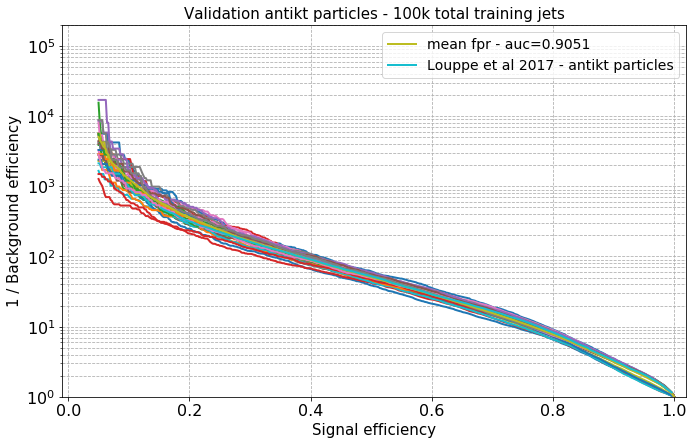

In [33]:
# Validation of Louppe et al 2017. Case Simple RecNN - antikt - particles
main_plot('./experiments/nyu_jet/nyu_jets_antikt-antikt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_100000_features_7',plot_name='Validation antikt particles', factor=0.001, report=True, mean_fpr=True,mean_prob=False,median_prob=False,show_all=True,  validation=True, val_filename='../data/digitized_plots/fig4_antikt.csv', class_label='antikt particles')

Number of models plotted =  28
           	&                       mean fpr 	& acc: 0.8316    	& auc: 0.9051 $\pm$ 0.0080 	& R:50.7 $\pm$ 5.7 \\
           	&             ensemble mean prob 	& acc: 0.8394    	& auc: 0.9149 $\pm$ 0.0080 	& R:67.1 $\pm$ 5.7 \\
           	&           ensemble median prob 	& acc: 0.8390    	& auc: 0.9149 $\pm$ 0.0080 	& R:67.4 $\pm$ 5.7 \\


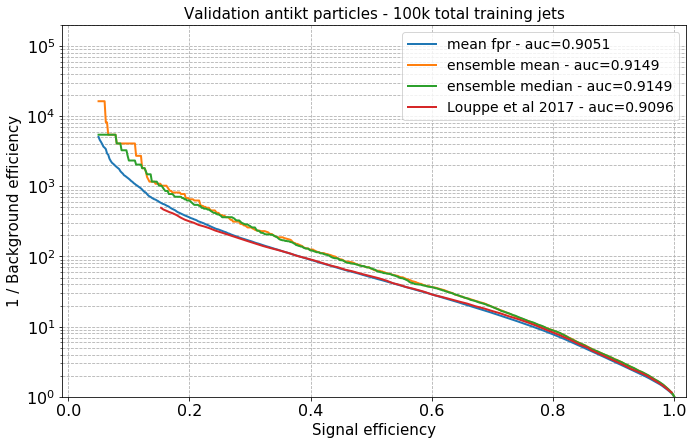

In [34]:
# Validation of Louppe et al 2017. Case Simple RecNN - antikt - particles. Now we add the mean and median results
main_plot('./experiments/nyu_jet/nyu_jets_antikt-antikt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_100000_features_7',plot_name='Validation antikt particles', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,  validation=True, val_filename='../data/digitized_plots/fig4_antikt.csv', class_label='auc=0.9096')

# Loppe et al 2017 result is:
# &                      mean prob 	& 0.9096 $\pm$ 0.0013 	& 51.7 $\pm$ 3.5 \\ (This should match the mean fpr result reported below)

### Gated RecNN (antikt - particles)

Number of models plotted =  29
           	&                       mean fpr 	& acc: 0.8378    	& auc: 0.9112 $\pm$ 0.0090 	& R:62.9 $\pm$ 9.7 \\
           	&             ensemble mean prob 	& acc: 0.8442    	& auc: 0.9188 $\pm$ 0.0090 	& R:78.1 $\pm$ 9.7 \\
           	&           ensemble median prob 	& acc: 0.8439    	& auc: 0.9187 $\pm$ 0.0090 	& R:77.0 $\pm$ 9.7 \\


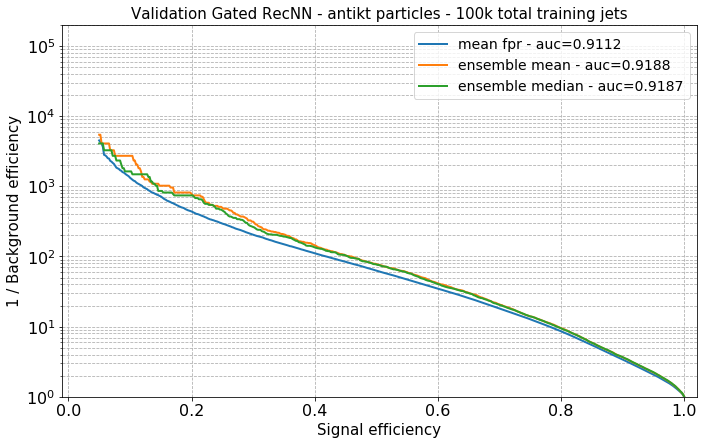

In [35]:
# Validation of Louppe et al 2017. Case Gated RecNN - antikt - particles
main_plot('./experiments/nyu_jet/nyu_jets_gatedRecNN_antikt-antikt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_100000_features_7',plot_name='Validation Gated RecNN - antikt particles', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False)
# Louppe et al 2017 result is:
#        	&                      mean prob 	& 0.9156 $\pm$ 0.0012 	& 68.3 $\pm$ 3.2 \\ (This should match the mean fpr result reported below)

## Top Tag Reference Dataset

#### Check True labels

In [21]:
results_dic_test= load_results('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_1200000_features_7',show_data=False)
 
print('len(results_dic_test)=',len(results_dic_test))    
# yProbTrue=results_dic_test[0]['yProbTrue']     
yProbTrue= np.asarray([element['yProbTrue'] for element in results_dic_test])

print('shape y_Prob=',np.shape(yProbTrue))

# print('yProbTrue=',yProbTrue[0,300000:300020,1])
for i in range(len(yProbTrue)):
    unique, counts = np.unique(yProbTrue[i,:,1], return_counts=True)
#     print('Number of sg and bg jets=',dict(zip(unique, counts)))
    
# print('yTrue[0,20:40,1]=',yProbTrue[0,20:40,1])


len(results_dic_test)= 10
shape y_Prob= (10, 400000, 2)


#### Simple RecNN

----------------------------------------
Number of models plotted =  8
Simple RecNN - h_d=40, lr=5e-4, batch=64 	&                       mean fpr 	& acc: 0.9318    	& auc: 0.9818 $\pm$ 0.0001 	& R:983.4 $\pm$ 26.5 \\
Simple RecNN - h_d=40, lr=5e-4, batch=64 	&             ensemble mean prob 	& acc: 0.9335    	& auc: 0.9825 $\pm$ 0.0001 	& R:1063.7 $\pm$ 26.5 \\
Simple RecNN - h_d=40, lr=5e-4, batch=64 	&           ensemble median prob 	& acc: 0.9334    	& auc: 0.9824 $\pm$ 0.0001 	& R:1086.8 $\pm$ 26.5 \\
----------------------------------------
Number of models plotted =  9
Simple RecNN - h_d=40, lr=5e-4, batch=64 	&                   median model 	& acc: 0.9319    	& auc: 0.9818 $\pm$ 0.0001 	& R:952.3 $\pm$ 26.0 \\
----------------------------------------
All bg rejection factors at  0.3 tag eff = [ 943.27358491  952.25714286  961.41346154  961.41346154  975.48292683
  994.89552239 1009.96969697 1009.96969697 1015.0964467 ]
-----------------------------------------------------------

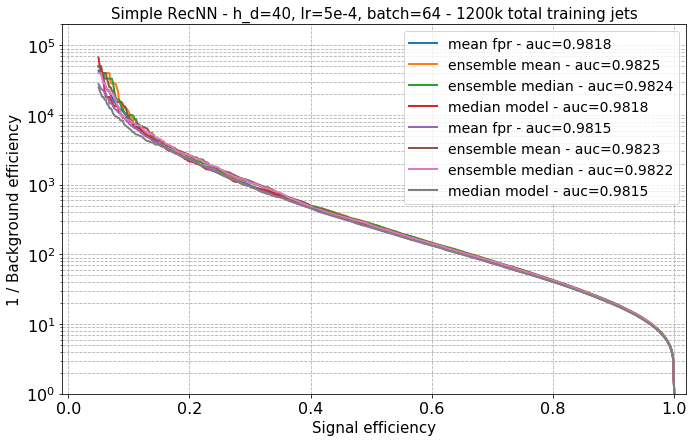

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [83]:
# Case Simple RecNN - kt algorithm
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_1200000_features_7',plot_name='Simple RecNN - h_d=40, lr=5e-4, batch=64', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='Simple RecNN - h_d=40, lr=5e-4, batch=64', show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_1200000_features_7',plot_name='Simple RecNN - h_d=40, lr=5e-4, batch=64', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True, input_name='Simple RecNN - h_d=40, lr=5e-4, batch=64', show_plot=False)
print('----'*44)

# Case Simple RecNN - kt algorithm
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_40_Njets_1200000_features_7',plot_name='Simple RecNN - h_d=40, lr=5e-3, batch=128', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='Simple RecNN - h_d=40, lr=5e-3, batch=128', show_plot=False)


#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_40_Njets_1200000_features_7',plot_name='Simple RecNN - h_d=40, lr=5e-4, batch=64', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True, input_name='Simple RecNN - h_d=40, lr=5e-4, batch=64', show_plot=True)
print('----'*44)


# # Case leaves/inners different weights -  RecNN - kt algorithm
# main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_leaves_inner_RecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_1200000_features_7',plot_name='Leaves/inner RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3,input_name='Leaves/inner RecNN')
# print('----'*44)


#Dipsikha'a result:
# AUC = 0.979, acc= 0.926,  bg rejection at 30% tag eff = 702

#### Gated

----------------------------------------
Number of models plotted =  9
           	&                       mean fpr 	& acc: 0.9308    	& auc: 0.9813 $\pm$ 0.0002 	& R:948.6 $\pm$ 46.2 \\
           	&             ensemble mean prob 	& acc: 0.9324    	& auc: 0.9821 $\pm$ 0.0002 	& R:1063.7 $\pm$ 46.2 \\
           	&           ensemble median prob 	& acc: 0.9324    	& auc: 0.9820 $\pm$ 0.0002 	& R:1052.5 $\pm$ 46.2 \\
----------------------------------------
Number of models plotted =  9
           	&                   median model 	& acc: 0.9311    	& auc: 0.9814 $\pm$ 0.0002 	& R:847.3 $\pm$ 46.2 \\
----------------------------------------
All bg rejection factors at  0.3 tag eff = [ 847.34745763  921.53917051  934.45794393  938.84507042  938.84507042
  966.05797101  980.26470588  994.89552239 1015.0964467 ]


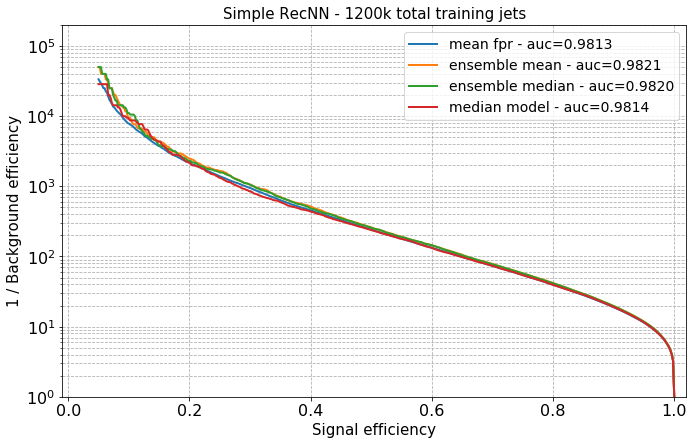

In [84]:
# Case Gated RecNN - kt algorithm
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_gatedRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_1200000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3,show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_gatedRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_1200000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True)


#Dipsikha'a result:
# AUC = 0.979, acc= 0.926,  bg rejection at 30% tag eff = 702

#### Leaves/inner different weights

----------------------------------------
Number of models plotted =  6
Leaves/inner RecNN 	&                       mean fpr 	& acc: 0.9315    	& auc: 0.9817 $\pm$ 0.0001 	& R:988.8 $\pm$ 36.3 \\
Leaves/inner RecNN 	&             ensemble mean prob 	& acc: 0.9327    	& auc: 0.9824 $\pm$ 0.0001 	& R:1047.0 $\pm$ 36.3 \\
Leaves/inner RecNN 	&           ensemble median prob 	& acc: 0.9327    	& auc: 0.9823 $\pm$ 0.0001 	& R:1069.4 $\pm$ 36.3 \\
----------------------------------------
Number of models plotted =  9
Leaves_inner_SimpleRecNN 	&                   median model 	& acc: 0.9316    	& auc: 0.9817 $\pm$ 0.0002 	& R:1052.5 $\pm$ 49.9 \\
----------------------------------------
All bg rejection factors at  0.3 tag eff = [ 865.68831169  930.11162791  938.84507042  961.41346154  966.05797101
  980.26470588  980.26470588 1015.0964467  1052.49473684]
Saving output probabilities and true values here: ../top_tag_reference_dataset/best_models/Leaves_inner_SimpleRecNN.pkl
yProbTrue shape= (40

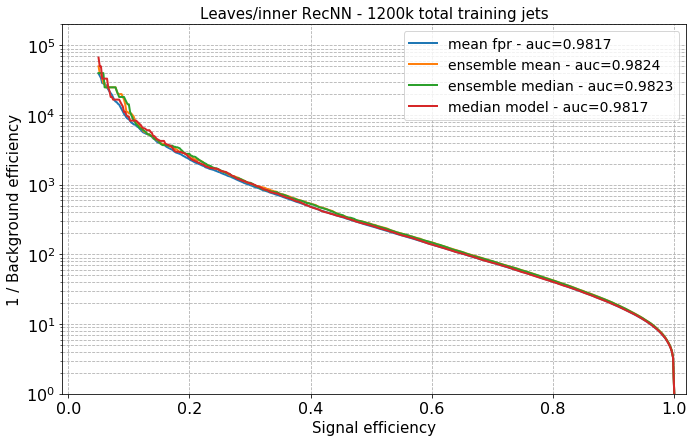

In [89]:
# Case Simple RecNN - kt algorithm
# main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_1200000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=True,tag_eff=0.3, input_name='Simple RecNN', show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
# main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True,show_plot=False)


# Case leaves/inners different weights -  RecNN - kt algorithm
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_leaves_inner_RecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_1200000_features_7',plot_name='Leaves/inner RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3,input_name='Leaves/inner RecNN', show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_leaves_inner_RecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_1200000_features_7',plot_name='Leaves/inner RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True, input_name='Leaves_inner_SimpleRecNN', show_plot=True,save_out_prob=True)

# #Case leaves/inners different weights - Top tag reference method: plot only the run that gives the median auc out ot 9 runs
# main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_leaves_inner_RecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True)

#Dipsikha'a result:
# AUC = 0.979, acc= 0.926,  bg rejection at 30% tag eff = 702

### NiN - 2L4W - leaves/inner different weights for u_k and the NiN layers

Case NiN RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128. 2 NiN layers, 4 W each (j=1 left/right and j>1 inner and outer nodes). Also leaves/inners different weights (u_k) 
----------------------------------------
Number of models plotted =  6
2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128  	&                       mean fpr 	& acc: 0.9334    	& auc: 0.9825 $\pm$ 0.0001 	& R:1060.7 $\pm$ 54.5 \\
2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128  	&             ensemble mean prob 	& acc: 0.9347    	& auc: 0.9831 $\pm$ 0.0001 	& R:1197.4 $\pm$ 54.5 \\
2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128  	&           ensemble median prob 	& acc: 0.9346    	& auc: 0.9830 $\pm$ 0.0001 	& R:1204.7 $\pm$ 54.5 \\
----------------------------------------
Number of models plotted =  9
2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128 	&                   median model 	& acc: 0.9331    	& auc: 0.9824 $\pm$ 0.0001 	& R:1162.6 $\pm$ 49.0 \\
----------------------------------------
Al

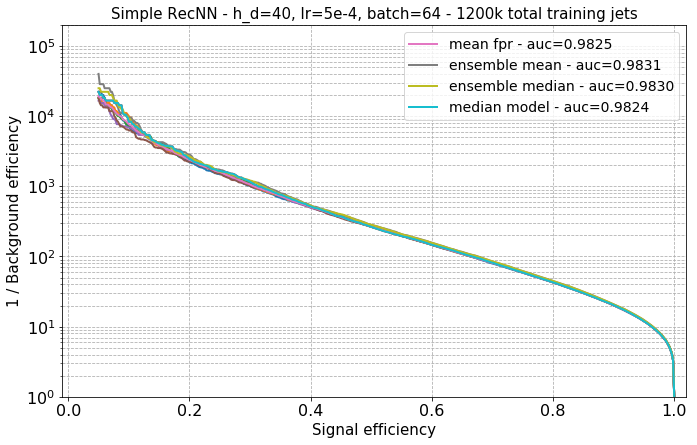

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [75]:
print('Case NiN RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128. 2 NiN layers, 4 W each (j=1 left/right and j>1 inner and outer nodes). Also leaves/inners different weights (u_k) ')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_kt_2L4WleavesInnerNiNuk_lr_0.002_decay_0.9_batch_128_epochs_40_hidden_50_Njets_1200000_features_7',plot_name='NiN RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=True,tag_eff=0.3, input_name='2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128 ',show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_kt_2L4WleavesInnerNiNuk_lr_0.002_decay_0.9_batch_128_epochs_40_hidden_50_Njets_1200000_features_7',plot_name='Simple RecNN - h_d=40, lr=5e-4, batch=64', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True, input_name='2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128', show_plot=True)
print('----'*44)

Case NiN RecNN - kt algorithm  - h_d=50, lr=2e-3, batch=128. 2 NiN layers, 3 W each (j=1 and j>1 inner and outer nodes). ReLU everything


/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


----------------------------------------
Number of models plotted =  2
2L3W leaves/inner NiN - h_d=50, lr=2e-3, batch=128   	&                       mean fpr 	& acc: 0.9333    	& auc: 0.9824 $\pm$ 0.0001 	& R:1074.0 $\pm$ 43.2 \\
2L3W leaves/inner NiN - h_d=50, lr=2e-3, batch=128   	&             ensemble mean prob 	& acc: 0.9343    	& auc: 0.9828 $\pm$ 0.0001 	& R:1123.4 $\pm$ 43.2 \\
2L3W leaves/inner NiN - h_d=50, lr=2e-3, batch=128   	&           ensemble median prob 	& acc: 0.9343    	& auc: 0.9828 $\pm$ 0.0001 	& R:1123.4 $\pm$ 43.2 \\
----------------------------------------
Number of models plotted =  2
2L3W leaves/inner NiN - h_d=50, lr=2e-3, batch=128 	&                   median model 	& acc: 0.9334    	& auc: 0.9825 $\pm$ 0.0001 	& R:1117.2 $\pm$ 43.2 \\
----------------------------------------
All bg rejection factors at  0.3 tag eff = [1117.17318436 1030.79381443]


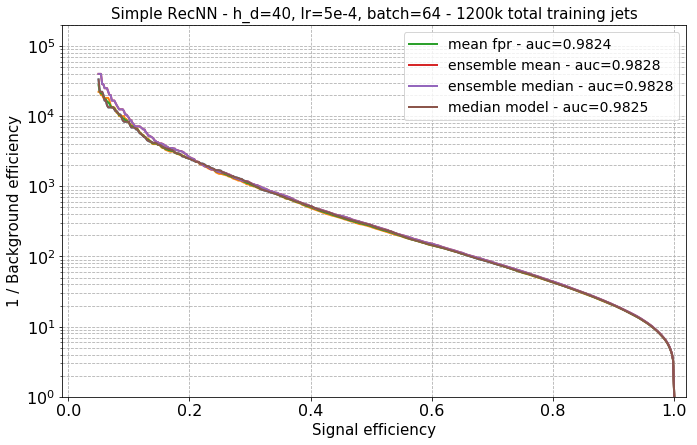

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [71]:
print('Case NiN RecNN - kt algorithm  - h_d=50, lr=2e-3, batch=128. 2 NiN layers, 3 W each (j=1 and j>1 inner and outer nodes). ReLU everything')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN2L3W_kt_2L3WleavesInnerNiNuk_lr_0.002_decay_0.86_batch_128_epochs_40_hidden_50_Njets_1200000_features_7',plot_name='NiN RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=True,tag_eff=0.3, input_name='2L3W leaves/inner NiN - h_d=50, lr=2e-3, batch=128  ',show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN2L3W_kt_2L3WleavesInnerNiNuk_lr_0.002_decay_0.86_batch_128_epochs_40_hidden_50_Njets_1200000_features_7',plot_name='Simple RecNN - h_d=40, lr=5e-4, batch=64', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True, input_name='2L3W leaves/inner NiN - h_d=50, lr=2e-3, batch=128', show_plot=True)
print('----'*44)

### Tests with 120k training - 40k val - 40k test jets

----------------------------------------
Number of models plotted =  5
Simple RecNN 	&                       mean fpr 	& acc: 0.9099    	& auc: 0.9687 $\pm$ 0.0013 	& R:223.8 $\pm$ 10.1 \\
Simple RecNN 	&             ensemble mean prob 	& acc: 0.9151    	& auc: 0.9720 $\pm$ 0.0013 	& R:264.5 $\pm$ 10.1 \\
Simple RecNN 	&           ensemble median prob 	& acc: 0.9142    	& auc: 0.9718 $\pm$ 0.0013 	& R:231.0 $\pm$ 10.1 \\
----------------------------------------
Number of models plotted =  1
Leaves/inner RecNN 	&                       mean fpr 	& acc: 0.9065    	& auc: 0.9659 $\pm$ 0.0000 	& R:207.2 $\pm$ 0.0 \\
Leaves/inner RecNN 	&             ensemble mean prob 	& acc: 0.9065    	& auc: 0.9659 $\pm$ 0.0000 	& R:207.2 $\pm$ 0.0 \\
Leaves/inner RecNN 	&           ensemble median prob 	& acc: 0.9065    	& auc: 0.9659 $\pm$ 0.0000 	& R:207.2 $\pm$ 0.0 \\


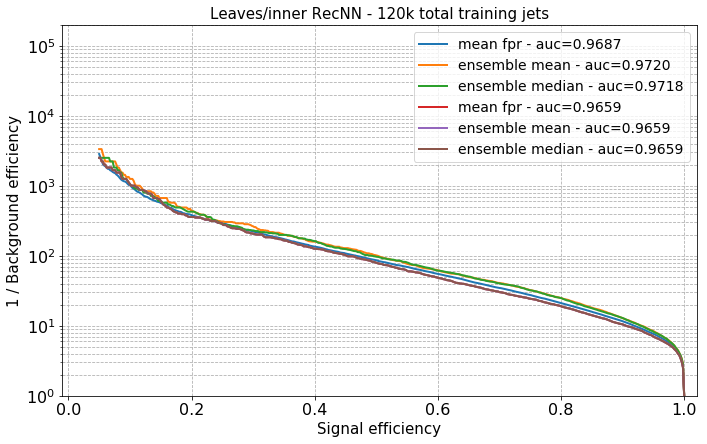

In [57]:
# Case Simple RecNN - kt algorithm
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='Simple RecNN', show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
# main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True,show_plot=False)


# Case leaves/inners different weights -  RecNN - kt algorithm
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_leaves_inner_RecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_120000_features_7',plot_name='Leaves/inner RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3,input_name='Leaves/inner RecNN')

# #Case leaves/inners different weights - Top tag reference method: plot only the run that gives the median auc out ot 9 runs
# main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_leaves_inner_RecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True)

#Dipsikha'a result:
# AUC = 0.979, acc= 0.926,  bg rejection at 30% tag eff = 702

Case Simple RecNN - kt algorithm  - h_d=40, lr=5e-4, batch=64
----------------------------------------
Number of models plotted =  5
Simple RecNN - h_d=40, lr=5e-4, batch=64 	&                       mean fpr 	& acc: 0.9099    	& auc: 0.9687 $\pm$ 0.0013 	& R:223.8 $\pm$ 10.1 \\
Simple RecNN - h_d=40, lr=5e-4, batch=64 	&             ensemble mean prob 	& acc: 0.9151    	& auc: 0.9720 $\pm$ 0.0013 	& R:264.5 $\pm$ 10.1 \\
Simple RecNN - h_d=40, lr=5e-4, batch=64 	&           ensemble median prob 	& acc: 0.9142    	& auc: 0.9718 $\pm$ 0.0013 	& R:231.0 $\pm$ 10.1 \\
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Case Simple RecNN - kt algorithm  - h_d=50, lr=5e-4, batch=128
----------------------------------------
Number of models plotted =  7
Simple RecNN - h_d=50, lr=5e-4, batch=128  	&                       mean fpr 	& acc: 0.9079    	& auc: 0.9671 $\pm$ 0.

----------------------------------------
Number of models plotted =  9
top_ref_auc= 4
top_ref_auc1= 4
2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128  	&                   median model 	& acc: 0.9235    	& auc: 0.9774 $\pm$ 0.0004 	& R:590.0 $\pm$ 57.4 \\
----------------------------------------
All bg rejection factors at  0.3 tag eff = [668.66666667 647.09677419 527.89473684 590.         590.
 573.14285714 501.5        647.09677419 668.66666667]


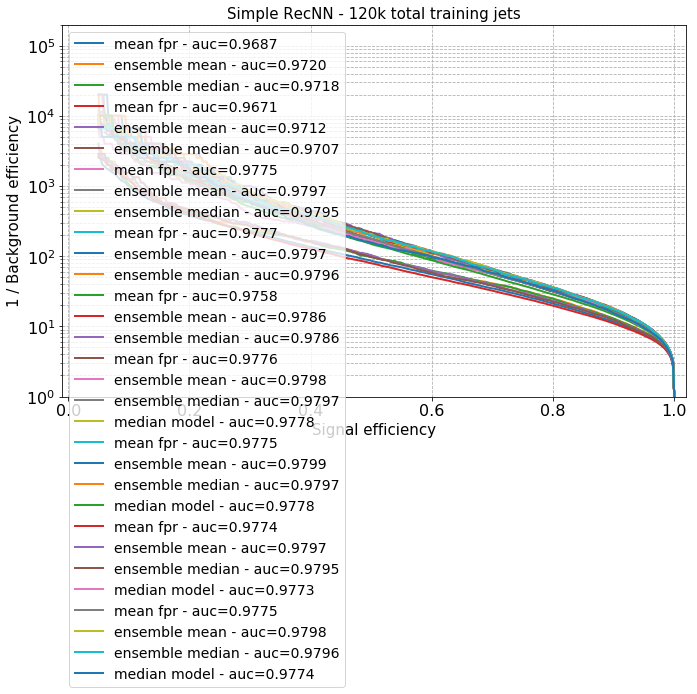

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [63]:
print('Case Simple RecNN - kt algorithm  - h_d=40, lr=5e-4, batch=64')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='Simple RecNN - h_d=40, lr=5e-4, batch=64', show_plot=False)
print('----'*44)

print('Case Simple RecNN - kt algorithm  - h_d=50, lr=5e-4, batch=128')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_128_epochs_30_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='Simple RecNN - h_d=50, lr=5e-4, batch=128 ', show_plot=False)
print('----'*44)

print('Case Simple RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.005_decay_0.9_batch_128_epochs_35_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='Simple RecNN - h_d=50, lr=5e-3, batch=128 ', show_plot=False)
print('----'*44)

print('Case Simple RecNN - kt algorithm  - h_d=40, lr=5e-3, batch=128')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='Simple RecNN - h_d=40, lr=5e-3, batch=128 ', show_plot=False)
print('----'*44)

print('Case gated RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_gatedRecNN_kt_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='Gated - h_d=50, lr=5e-3, batch=128 ', show_plot=False)
print('----'*44)

print('Case NiN RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128. 2 NiN layers, 3 W each (j=1 and j>1 inner and outer nodes). ReLU everything')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_kt_2L3WleavesInnerNiN_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='2L3W leaves/inner NiN - h_d=50, lr=5e-3, batch=128 ', show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_kt_2L3WleavesInnerNiN_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True, input_name='2L3W leaves/inner NiN - h_d=50, lr=5e-3, batch=128 ',show_plot=False)

print('----'*44)


print('Case NiN RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128. 2 NiN layers, 3 W each (j=1 and j>1 inner and outer nodes). tanh between NiN layers, ReLU everything else')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_kt_2L3WleavesInnerNiN_tanh_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='2L3W leaves/inner NiN - h_d=50, lr=5e-3, batch=128 ', show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_kt_2L3WleavesInnerNiN_tanh_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True, input_name='2L3W leaves/inner NiN - h_d=50, lr=5e-3, batch=128 ',show_plot=False)
print('----'*44)



print('Case NiN RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128. 2 NiN layers, 4 W each (j=1 left/right and j>1 inner and outer nodes). Also leaves/inners different weights (u_k) - NEW')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_kt_2L4WleavesInnerNiNuk_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='NiN RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128 ',show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_kt_2L4WleavesInnerNiNuk_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True, input_name='2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128',show_plot=False)
print('----'*44)

print('Case NiN RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128. 2 NiN layers, 4 W each (j=1 left/right and j>1 inner and outer nodes). Also leaves/inners different weights (u_k)')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_2L4WleavesInner_ukNiN_kt_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='NiN RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128 ',show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_2L4WleavesInner_ukNiN_kt_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3, input_name='2L4W leaves/inner ukNiN - h_d=50, lr=5e-3, batch=128 ',top_ref=True)
print('----'*44)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
# main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True,show_plot=False)


# Case leaves/inners different weights -  RecNN - kt algorithm
# main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_leaves_inner_RecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_120000_features_7',plot_name='Leaves/inner RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3,input_name='Leaves/inner RecNN')

# #Case leaves/inners different weights - Top tag reference method: plot only the run that gives the median auc out ot 9 runs
# main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_leaves_inner_RecNN_kt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True)

#Dipsikha'a result:
# AUC = 0.979, acc= 0.926,  bg rejection at 30% tag eff = 702

----------------------------------------
Number of models plotted =  9
Simple RecNN - h_d=50, lr=5e-3, batch=128 	&                       mean fpr 	& acc: 0.9239    	& auc: 0.9775 $\pm$ 0.0008 	& R:627.9 $\pm$ 96.9 \\
Simple RecNN - h_d=50, lr=5e-3, batch=128 	&             ensemble mean prob 	& acc: 0.9285    	& auc: 0.9797 $\pm$ 0.0008 	& R:835.8 $\pm$ 96.9 \\
Simple RecNN - h_d=50, lr=5e-3, batch=128 	&           ensemble median prob 	& acc: 0.9281    	& auc: 0.9795 $\pm$ 0.0008 	& R:835.8 $\pm$ 96.9 \\
----------------------------------------
Number of models plotted =  9
           	&                   median model 	& acc: 0.9234    	& auc: 0.9776 $\pm$ 0.0008 	& R:501.5 $\pm$ 96.9 \\
----------------------------------------
All bg rejection factors at  0.3 tag eff = [573.14285714 626.875      607.87878788 802.4        542.16216216
 501.5        771.53846154 668.66666667 557.22222222]
-------------------------------------------------------------------------------------------------

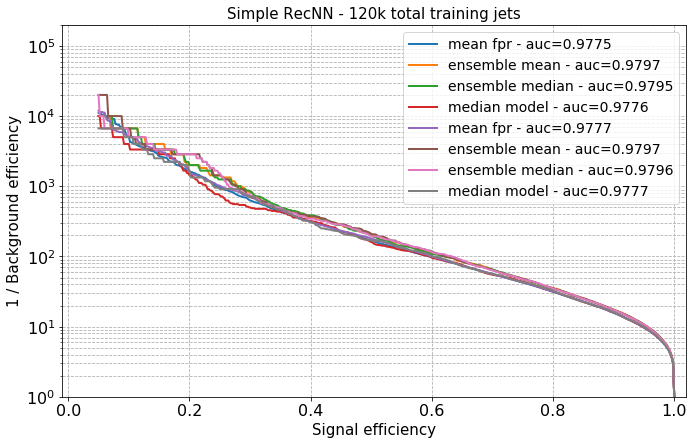

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [68]:


main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.005_decay_0.9_batch_128_epochs_35_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='Simple RecNN - h_d=50, lr=5e-3, batch=128' , show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.005_decay_0.9_batch_128_epochs_35_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True,show_plot=False)
print('----'*44)



main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='Simple RecNN - h_d=40, lr=5e-3, batch=128 ',show_plot=False)

#Top tag reference method: plot only the run that gives the median auc out ot 9 runs
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_simpleRecNN_kt_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_40_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=False,mean_prob=False,median_prob=False,show_all=False,tag_eff=0.3,top_ref=True)
print('----'*44)

Case NiN RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128. 2 NiN layers, 3 W each (j=1 and j>1 inner and outer nodes). ReLU everything
Number of models plotted =  10
2L3W leaves/inner NiN - h_d=50, lr=5e-3, batch=128  	&                       mean fpr 	& acc: 0.9243    	& auc: 0.9776 $\pm$ 0.0003 	& R:597.5 $\pm$ 104.8 \\
2L3W leaves/inner NiN - h_d=50, lr=5e-3, batch=128  	&             ensemble mean prob 	& acc: 0.9290    	& auc: 0.9798 $\pm$ 0.0003 	& R:802.4 $\pm$ 104.8 \\
2L3W leaves/inner NiN - h_d=50, lr=5e-3, batch=128  	&           ensemble median prob 	& acc: 0.9290    	& auc: 0.9797 $\pm$ 0.0003 	& R:771.5 $\pm$ 104.8 \\
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Case NiN RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128. 2 NiN layers, 3 W each (j=1 and j>1 inner and outer nodes). tanh between NiN layers, ReLU everything else
Number of mode

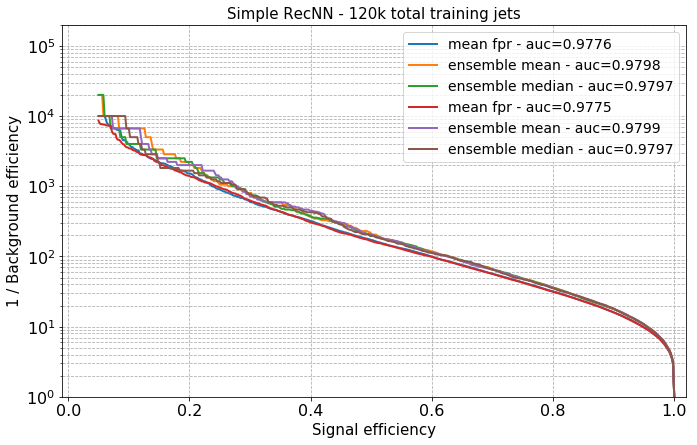

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [52]:
print('Case NiN RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128. 2 NiN layers, 3 W each (j=1 and j>1 inner and outer nodes). ReLU everything')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_kt_2L3WleavesInnerNiN_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='2L3W leaves/inner NiN - h_d=50, lr=5e-3, batch=128 ', show_plot=False)
print('----'*44)


print('Case NiN RecNN - kt algorithm  - h_d=50, lr=5e-3, batch=128. 2 NiN layers, 3 W each (j=1 and j>1 inner and outer nodes). tanh between NiN layers, ReLU everything else')
main_plot('./experiments/top_tag_reference_dataset/top_tag_reference_dataset_NiNRecNN_kt_2L3WleavesInnerNiN_tanh_lr_0.005_decay_0.9_batch_128_epochs_40_hidden_50_Njets_120000_features_7',plot_name='Simple RecNN', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,tag_eff=0.3, input_name='2L3W leaves/inner NiN - h_d=50, lr=5e-3, batch=128 ')

print('----'*44)

In [41]:
# Test plotting multiple plots together
# main_plot('./experiments/nyu_jet/nyu_jets_antikt-antikt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_100000_features_7',plot_name='Validation antikt particles', factor=0.001, report=True, mean_fpr=True,mean_prob=True,median_prob=True,show_all=False,  validation=True, val_filename='../data/digitized_plots/fig4_antikt.csv', class_label='auc=0.9096', show_plot=False)

# main_plot('./experiments/nyu_jet/nyu_jets_gatedRecNN_antikt-antikt_lr_0.0005_decay_0.9_batch_64_epochs_25_hidden_40_Njets_100000_features_7',plot_name='Validation Gated RecNN - antikt particles', factor=0.001, report=True, mean_fpr=True,mean_prob=False,median_prob=False,show_all=True,  show_plot=False)

# plot_show(filename='test',totjets='100000',title='joint plot')